In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os

In [2]:
! git clone https://github.com/s0neq/d2022.git

Cloning into 'd2022'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 127 (delta 19), reused 0 (delta 0), pack-reused 69
Receiving objects: 100% (127/127), 32.24 MiB | 23.60 MiB/s, done.
Resolving deltas: 100% (62/62), done.


unpack folders with imgs to current directory

In [3]:
!for f in d2022/generated/*.tar.gz; do tar xf "$f"; done

In [4]:
!ls

d2022		    nsubj_Number_error	     root_Mood_true	root_Tense_true
lem_sent	    nsubj_Number_true	     root_Number_error	sample_data
lem_sent_true	    reverse_word_order	     root_Number_true
nsubj_Gender_error  reverse_word_order_true  root_Tense_error
nsubj_Gender_true   root_Mood_error	     root_Tense_error1


# get images for *nsubj_Gender* feature

In [5]:
FEATURE = "nsubj_Gender"

In [7]:
path_true = FEATURE + "_true"
path_mod = FEATURE + "_error"

jpgs = [el for el in os.listdir(path_true) if not el.startswith(".")]

## display image pair with captions 

In [22]:
ind = 87

In [23]:
name = jpgs[ind]

In [24]:
im = Image.open(os.path.join(path_true,  name))
im_mod = Image.open(os.path.join(path_mod, name))

In [25]:
name  # captionID_imgID

'167229_58651.jpg'

In [26]:
imgID = int(name.strip(".jpg").split("_")[1])

csvs with texts

In [6]:
! find -maxdepth 2 -name '$FEATURE*.csv'

./d2022/nsubj_Gender_true.csv
./d2022/nsubj_Gender_error.csv


In [27]:
true_caps = pd.read_csv("d2022/" + path_true + ".csv")
true_cap = list(true_caps[true_caps.img_id == imgID].sent)[0]
mod_caps = pd.read_csv("d2022/" + path_mod + ".csv")
mod_cap = list(mod_caps[mod_caps.img_id == imgID].sent)[0]

true:  Зеленый поезд проходит через депо.
modified:  зелёная поезд проходит через депо.


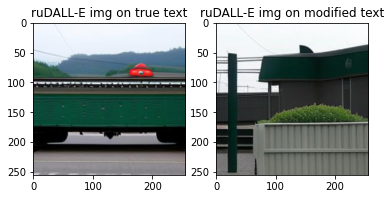

In [28]:
plt.subplot(1, 2, 1)
plt.title("ruDALL-E img on true text")
plt.imshow(im)

plt.subplot(1, 2, 2)
plt.title("ruDALL-E img on modified text")
plt.imshow(im_mod)

print("true: ", true_cap)
print("modified: ", mod_cap)